### Loading the data set

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
from data_loader import DataLoader

In [66]:
import numpy as np
import pandas as pd
import os

In [67]:
# According to the CIFAR-10 website, the training set is split into five batches
# stored in fives files. Each colour image has dimensions equal to 32 x 32 x 3. There
# are 10 classes.
image_width, image_height, image_Nchannels = 32, 32, 3
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
# The default values of all the arguments of the load_batch function have been
# set for the CIFAR-10 dataset.
X_train, y_train = DataLoader.load_batch('data_batch')
X_test, y_test = DataLoader.load_batch('test_batch', Nbatches=1)

### Task 1: Split data set into train and validation data set

In [75]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2 ,random_state = 42)
print(X_train.shape)
print(x_train.shape, x_val.shape)
print(y_train.shape)
print(type(x_train))

(50000, 32, 32, 3)
(40000, 32, 32, 3) (10000, 32, 32, 3)
(40000,)
<class 'numpy.ndarray'>


### Task2: Use defined function to check the pictures in different sets

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot20(set_name,x_train,y_train):
    print("Pictures from",set_name)
    n_rows = 4
    n_cols = 5
    plt.figure(figsize = (n_cols * 2, n_rows * 2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_train[index])
            plt.axis('off')
            plt.title(class_names[y_train[index]])
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.show()

Pictures from train


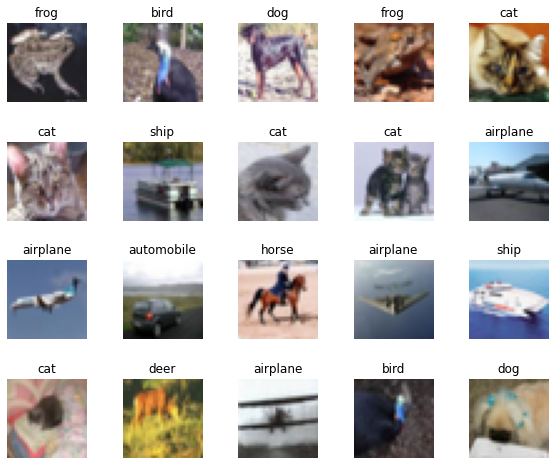


Pictures from validation


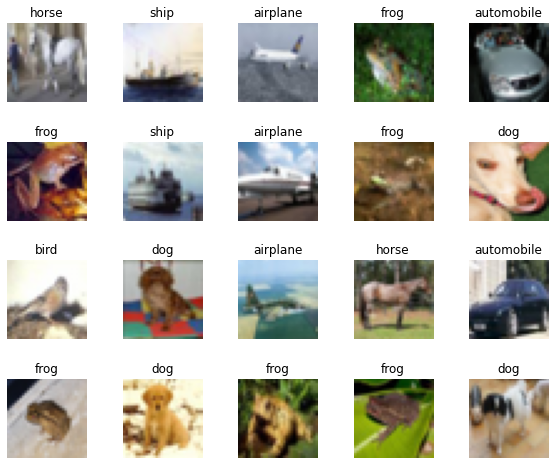


Pictures from test


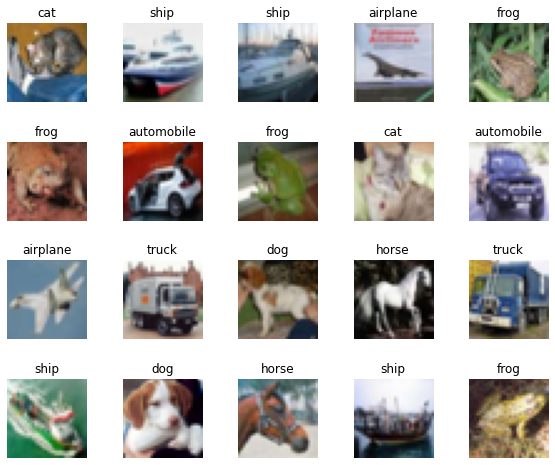

In [ ]:
plot20("train",x_train,y_train)
print()
plot20("validation",x_val,y_val)
print()
plot20("test",X_test,y_test)

### Task3: Formulating MLP model

In [73]:
import tensorflow  as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# add two hidden layers

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               921900    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

##### Searching hypermeters "learning rate" and "drop out rate" with gridsearch

In [71]:
def build_model(learning_rate = 0.01, dropout_rate = 0.0, kernel_initializer = "glorot_uniform"):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(300, activation = 'relu', kernel_initializer = kernel_initializer))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(100, activation = 'relu', kernel_initializer = kernel_initializer))
    model.add(keras.layers.Dropout(dropout_rate))
    model.add(keras.layers.Dense(10, activation = "softmax"))
    optimizer = keras.optimizers.SGD(learning_rate)
    model.compile(loss = 'sparse_categorical_crossentropy',
                  optimizer = tf.keras.optimizers.SGD(lr = 0.01),
                  metrics = "accuracy")
    return model

In [76]:
 keras.backend.clear_session()
 np.random.seed(42)
 tf.random.set_seed(42)

In [79]:
# sklearn_model = KerasClassifier(build_fn = build_model,epochs = 3)
# #learning_rate = [0.0001, 0.001, 0.01, 0.1]
# learning_rate = [0.01]
# #dropout_rate = [0.05, 0.1, 0.3, 0.5]
# dropout_rate = [0.05]
# kernel_initializer = ["glorot_uniform", "he_normal"]
# param_grid = dict(learning_rate = learning_rate, dropout_rate = dropout_rate, kernel_initializer = kernel_initializer )
# grid = GridSearchCV(estimator = sklearn_model, param_grid = param_grid)
# grid_result = grid.fit(x_train,y_train)

Epoch 1/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0716 - accuracy: 0.2454
Epoch 2/3
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8191 - accuracy: 0.3495
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 1.6730 - accuracy: 0.4069
Epoch 1/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0649 - accuracy: 0.2463
Epoch 2/3
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8193 - accuracy: 0.3526
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 1.7109 - accuracy: 0.3938
Epoch 1/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0715 - accuracy: 0.2449
Epoch 2/3
1000/1000 [==============================] - 2s 2ms/step - loss: 1.8266 - accuracy: 0.3510
Epoch 3/3
250/250 [==============================] - 1s 2ms/step - loss: 1.7018 - accuracy: 0.3954
Epoch 1/3
1000/1000 [==============================] - 2s 2ms/step - loss: 2.0811 - accuracy: 0.2

In [ ]:
#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

##### Using the gridsearch function, we can find the best learning rate for this model is 0.01, the dropout rate is 0.05 and kernel initializer is glorot_uniform. The dropout rate is used to prevent overfitting. We can test the model on the test set to see whether there is still overfitting.

In [81]:
# Change dropout rate to 0.05

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(300, activation = "relu", kernel_initializer = "glorot_uniform"))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(100, activation = "relu", kernel_initializer = "glorot_uniform"))
model.add(keras.layers.Dropout(0.05))
model.add(keras.layers.Dense(10, activation = "softmax"))

In [82]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout_52 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_53 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [83]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = tf.keras.optimizers.SGD(lr = 0.01),
              metrics = "sparse_categorical_accuracy")

In [85]:
# Use defined function to change the learning rate based on epoch and define early stopping function

def schedule(epoch):
    if epoch < 40 :
        lr = 1e-2
    elif epoch < 10:
        lr = 1e-3
    else:
        lr = 1e-4
    return lr

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule, verbose = 0)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 10,restore_best_weights = True)

##### Train the model on train set with early stopping function(epoch = 100)

In [86]:
MLP_history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_val, y_val),callbacks = [scheduler, early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0547 - sparse_categorical_accuracy: 0.2491 - val_loss: 1.7974 - val_sparse_categorical_accuracy: 0.3627
Epoch 2/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7909 - sparse_categorical_accuracy: 0.3609 - val_loss: 1.7359 - val_sparse_categorical_accuracy: 0.3873
Epoch 3/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.7252 - sparse_categorical_accuracy: 0.3883 - val_loss: 1.6562 - val_sparse_categorical_accuracy: 0.4117
Epoch 4/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6600 - sparse_categorical_accuracy: 0.4156 - val_loss: 1.6094 - val_sparse_categorical_accuracy: 0.4249
Epoch 5/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.6088 - sparse_categorical_accuracy: 0.4286 - val_loss: 1.5716 - val_sparse_categorical_accuracy: 0.4404
Epoch 6/100
1250/1250 [==============================] - 3s 3ms/step - loss: 1.5815 -

### MLP model evulation

##### Testing MLP on test set

In [87]:
MLP_score = model.evaluate(X_test, y_test, verbose = 1)
print('Test loss:', MLP_score[0])
print('Test accuracy:', MLP_score[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.2798 - sparse_categorical_accuracy: 0.5454
Test loss: 1.2797716856002808
Test accuracy: 0.5454000234603882


##### MLP F1 score

In [88]:
from sklearn.metrics import f1_score,classification_report
y_p = model.predict(X_test)
y_pred = np.argmax(y_p, axis=1)
f1 = f1_score(y_test,y_pred,average = 'macro')
print("F1 score of MLP model:", f1)

F1 score of MLP model: 0.542584835013779


##### MLP Confusion matrix

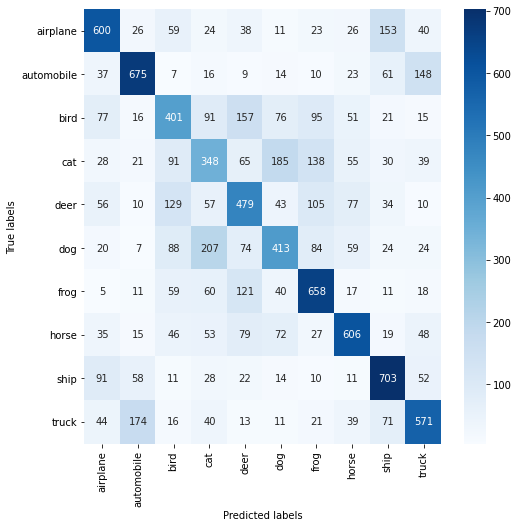

In [89]:
con_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 8))
x_t = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
y_t = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(con_mat, annot = True,xticklabels = x_t, yticklabels = y_t, cmap = 'Blues',fmt = "d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### Save model

In [90]:
model.save("Wenjun_shi_MLP","/content/drive/MyDrive/save_model/model")

INFO:tensorflow:Assets written to: Wenjun_shi_MLP/assets


In [91]:
!zip -r Wenjun_shi_MLP.zip Wenjun_shi_MLP

updating: Wenjun_shi_MLP/ (stored 0%)
updating: Wenjun_shi_MLP/variables/ (stored 0%)
updating: Wenjun_shi_MLP/variables/variables.index (deflated 53%)
updating: Wenjun_shi_MLP/variables/variables.data-00000-of-00001 (deflated 7%)
updating: Wenjun_shi_MLP/saved_model.pb (deflated 89%)
updating: Wenjun_shi_MLP/assets/ (stored 0%)


In [92]:
from google.colab import files
files.download('Wenjun_shi_MLP.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model.save("Wenjun_shi_MLP")

INFO:tensorflow:Assets written to: Wenjun_shi_MLP/assets


### Task4: Formulating CNN model

In [ ]:
# Formulating three convolutional layers

model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(filters = 16,kernel_size=(3,3),activation='relu',input_shape=[32, 32, 3]))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Dropout(0.05))
    
model1.add(keras.layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu', padding='same'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Dropout(0.05))

model1.add(keras.layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu', padding='same'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Dropout(0.05))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dense(300,kernel_initializer='he_normal', activation = "relu"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dropout(0.05))
model1.add(keras.layers.Dense(10, kernel_initializer='glorot_uniform', activation = "softmax"))

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)         

##### Selecting parameters "filters" and "kernel_size" with gridsearch

In [ ]:
def create_model(filters = 32 ,kernel_size = 3, activation = "relu"):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters = filters,kernel_size = kernel_size, activation = 'relu',input_shape = [32, 32, 3]))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Dropout(0.05))
    
    model.add(keras.layers.Conv2D(filters = int(2*filters),kernel_size = kernel_size, activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Dropout(0.05))
    
    model.add(keras.layers.Conv2D(filters = int(2*2*filters),kernel_size = kernel_size, activation = 'relu', padding = 'same'))
    model.add(keras.layers.MaxPooling2D(2,2))
    model.add(keras.layers.Dropout(0.05))

    model.add(keras.layers.Flatten())
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dense(300, activation = activation))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.05))
    model.add(keras.layers.Dense(10, activation = "softmax"))
    
    model.compile(loss = "sparse_categorical_crossentropy",
               optimizer = tf.keras.optimizers.SGD(lr = 0.01),
               metrics = "accuracy")
    
    return model

In [ ]:
# CNN_model = KerasClassifier(build_fn = create_model,epochs = 3)
# filters= [18, 32, 64]
# kernel_size = [3,4,5]
# activation = ['relu','sigmoid']
# param_grid = dict(filters = filters, kernel_size = kernel_size, activation = activation)
# grid2 = GridSearchCV(estimator = CNN_model, param_grid = param_grid)
# grid2_result = grid2.fit(x_train,y_train, validation_data = (x_val, y_val))

In [ ]:
#print("Best: %f using %s" % (grid2_result.best_score_, grid2_result.best_params_))

##### The best parameters suggest that we should use 32 for filters, 3 for kernel size and relu as activation. For this model, kernel size equal to five is not suitable.

In [ ]:
# Change the filters to 32

model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=[32, 32, 3]))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Dropout(0.05))
    
model1.add(keras.layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu', padding='same'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Dropout(0.05))

model1.add(keras.layers.Conv2D(filters = 128,kernel_size=(3,3),activation='relu', padding='same'))
model1.add(keras.layers.MaxPooling2D(2,2))
model1.add(keras.layers.Dropout(0.05))

model1.add(keras.layers.Flatten())
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dense(300,kernel_initializer='he_normal', activation = "relu"))
model1.add(keras.layers.BatchNormalization())
model1.add(keras.layers.Dropout(0.05))
model1.add(keras.layers.Dense(10, kernel_initializer='glorot_uniform', activation = "softmax"))

In [ ]:
model1.compile(loss = "sparse_categorical_crossentropy",
               optimizer = tf.keras.optimizers.SGD(lr = 0.01),
               metrics = "accuracy")

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

##### Train CNN model with early stopping(epoch = 100)

In [ ]:
history1 = model1.fit(x_train, y_train, epochs = 100,  validation_data = (x_val, y_val), callbacks = [early_stopping_cb])

Epoch 1/100
1250/1250 [==============================] - 36s 4ms/step - loss: 1.9638 - accuracy: 0.3251 - val_loss: 1.9593 - val_accuracy: 0.3634
Epoch 2/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.3589 - accuracy: 0.5143 - val_loss: 1.3480 - val_accuracy: 0.5351
Epoch 3/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.2016 - accuracy: 0.5732 - val_loss: 1.0977 - val_accuracy: 0.6145
Epoch 4/100
1250/1250 [==============================] - 5s 4ms/step - loss: 1.0784 - accuracy: 0.6189 - val_loss: 1.0522 - val_accuracy: 0.6267
Epoch 5/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9911 - accuracy: 0.6537 - val_loss: 1.0512 - val_accuracy: 0.6481
Epoch 6/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.9228 - accuracy: 0.6780 - val_loss: 1.0604 - val_accuracy: 0.6405
Epoch 7/100
1250/1250 [==============================] - 5s 4ms/step - loss: 0.8666 - accuracy: 0.6976 - val_loss: 0.9391 - val_a

##### CNN model evulation

In [ ]:
CNN_scores = model1.evaluate(X_test, y_test, verbose=1)
print('Test loss:', CNN_scores[0])
print('Test accuracy:', CNN_scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.7508 - accuracy: 0.7588
Test loss: 0.7507789731025696
Test accuracy: 0.7588000297546387


##### CNN model F1 score

In [ ]:
y_p2 = model1.predict(X_test)
y_pred2 = np.argmax(y_p2, axis=1)
f1_CNN = f1_score(y_test,y_pred2,average = 'macro')
print("F1 score of CNN model:", f1_CNN)

F1 score of CNN model: 0.7574865074836062


##### CNN model confusion matrix

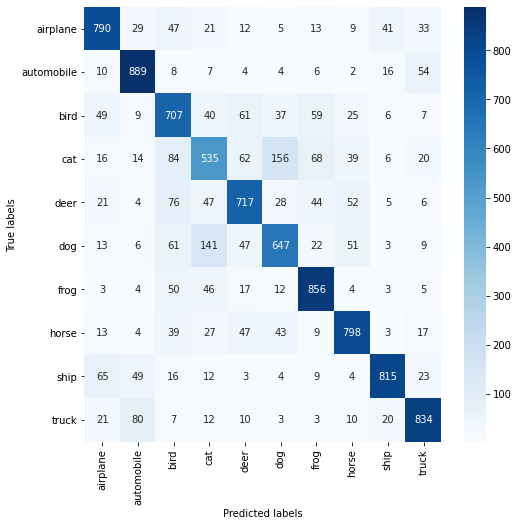

In [ ]:
con_mat = confusion_matrix(y_test, y_pred2)

plt.figure(figsize = (8, 8))
x_t = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
y_t = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(con_mat, annot = True,xticklabels = x_t, yticklabels = y_t, cmap = 'Blues',fmt = "d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
model1.save("Wenjun_shi_CNN")

INFO:tensorflow:Assets written to: Wenjun_shi_CNN/assets


In [ ]:
!zip -r Wenjun_shi_CNN.zip Wenjun_shi_CNN

  adding: Wenjun_shi_CNN/ (stored 0%)
  adding: Wenjun_shi_CNN/variables/ (stored 0%)
  adding: Wenjun_shi_CNN/variables/variables.index (deflated 60%)
  adding: Wenjun_shi_CNN/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: Wenjun_shi_CNN/saved_model.pb (deflated 89%)
  adding: Wenjun_shi_CNN/assets/ (stored 0%)


In [ ]:
files.download('Wenjun_shi_CNN.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Task 5: check and display the saved model 

##### MLP model

In [94]:
# if the model is in the current folder
# Load the model and train for one epoch
if os.path.isdir('Wenjun_shi_MLP'):
    Wenjun_MLP = keras.models.load_model('Wenjun_shi_MLP')
    # Display the model
    print(Wenjun_MLP.summary())
    Wenjun_MLP.fit(x_train, y_train, epochs = 1, validation_data = (x_val, y_val),callbacks = [scheduler, early_stopping_cb])
else:
    # if the model is not in the model
    # Build the model and train for 100 epochs
    MLP_model = build_model(learning_rate = 0.01,dropout_rate = 0.05, kernel_initializer = "glorot_uniform")
    MLP_model.fit(x_train, y_train, epochs = 100, validation_data = (x_val, y_val),callbacks = [scheduler, early_stopping_cb])
    # Display the model
    print(MLP_model.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_51 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout_52 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_53 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [95]:
WJ_MLP_scores = Wenjun_MLP.evaluate(X_test, y_test, verbose=1)
print('Test loss:', WJ_MLP_scores[0])
print('Test accuracy:', WJ_MLP_scores[1])

313/313 [==============================] - 1s 2ms/step - loss: 1.3355 - sparse_categorical_accuracy: 0.5285
Test loss: 1.3355234861373901
Test accuracy: 0.5285000205039978


##### Check MLP prediction result

In [96]:
y_p = Wenjun_MLP.predict(X_test)
y_pred_MLP = np.argmax(y_p, axis=1)

In [97]:
def plotpre(set_name,x_train,y_train,y_pred):
    print("Pictures from",set_name)
    n_rows = 6
    n_cols = 6
    plt.figure(figsize = (n_cols * 2, n_rows * 2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            plt.imshow(x_train[index])
            plt.axis('off')
            plt.title("True: %s \nPredict: %s" % (class_names[y_train[index]],class_names[y_pred[index]]))
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    plt.show()

Pictures from test


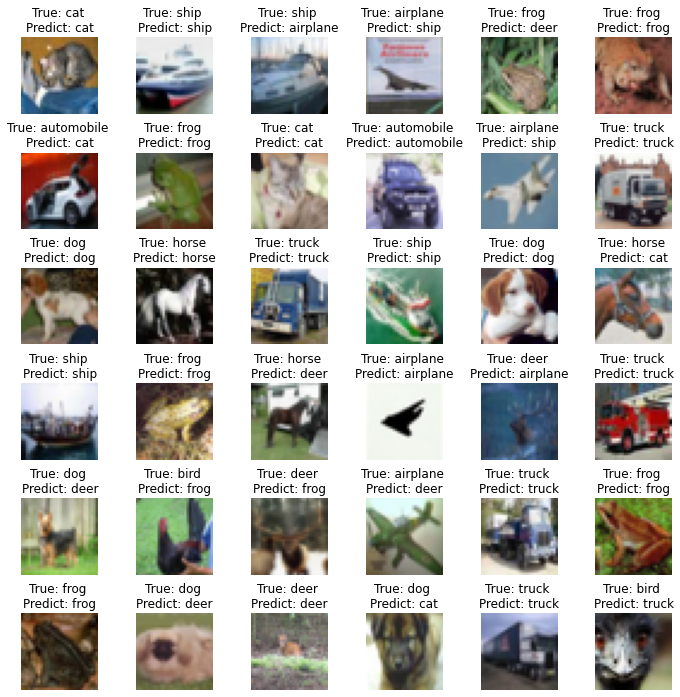

In [ ]:
plotpre("test",X_test,y_test,y_pred_MLP)

##### There are a few mistakes in the prediction result. For example, two airplane are predicted to be ship. A frog is predicted to be a deer. A truck is predicted to be an automobile. A cat is predicted to be dog. A horse is predicted to be a cat and an automobile predicted to be a dog. In conclusion, the prediction accuracy is not very high.

##### CNN model

In [ ]:
# if the model is in the current folder
# Load the model and train for one epoch
if os.path.isdir('Wenjun_shi_CNN'):
    Wenjun_CNN = keras.models.load_model('Wenjun_shi_CNN')
    # Display the model
    print(Wenjun_CNN.summary())
    Wenjun_CNN.fit(X_test, y_test, epochs = 1, validation_data = (x_val, y_val),callbacks = [early_stopping_cb])
else:
    # if the model is not in the model
    # Build the model and train for 100 epochs
    CNN_model = create_model(filters = 32, kernel_size = 3, activation = "relu")
    CNN_model.fit(x_train, y_train, epochs = 100, validation_data = (x_val, y_val),callbacks = [scheduler, early_stopping_cb])
    # Display the model
    print(CNN_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)        

In [ ]:
WJ_CNN_scores = Wenjun_CNN.evaluate(X_test, y_test, verbose=1)
print('Test loss:', WJ_CNN_scores[0])
print('Test accuracy:', WJ_CNN_scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.8236 - accuracy: 0.7292
Test loss: 0.8236191272735596
Test accuracy: 0.729200005531311


### Check CNN prediction result

In [ ]:
from sklearn.metrics import f1_score,classification_report
y_p = Wenjun_CNN.predict(X_test)
y_pred_CNN = np.argmax(y_p, axis=1)

In [ ]:
plotpre("test",X_test,y_test,y_pred_CNN)

##### Through the prediction result, we can find most of the prediction results are right but there are still a few mistakes. For example, a dog is predicted to be a deer. A deer is predicted to be a bird. The classifier is not good at classifying deer. In conclusion, CNN classifier is better than MLP classifier.

### Task6: Comparison and comments

Comparison based on the build model

In [ ]:
print('MLP Test accuracy:', MLP_score[1])
print('CNN Test accuracy:', CNN_scores[1])

MLP Test accuracy: 0.5307999849319458
CNN Test accuracy: 0.7429999709129333


In [ ]:
print("F1 score of MLP model:", f1)
print("F1 score of CNN model:", f1_CNN)

F1 score of MLP model: 0.5270816211821838
F1 score of CNN model: 0.7422939321378368


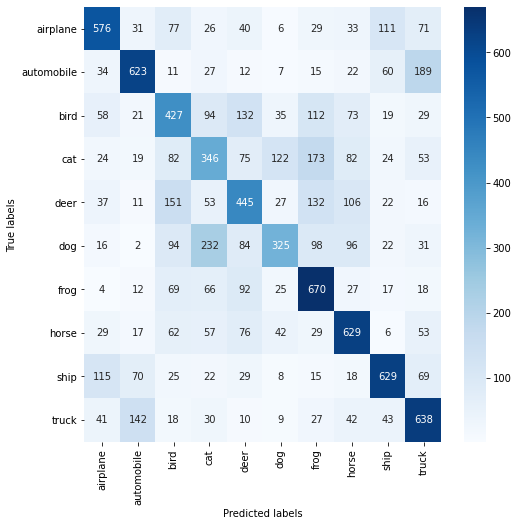

In [ ]:
#MLP confusion matrix
con_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (8, 8))
x_t = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
y_t = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(con_mat, annot = True,xticklabels = x_t, yticklabels = y_t, cmap = 'Blues',fmt = "d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

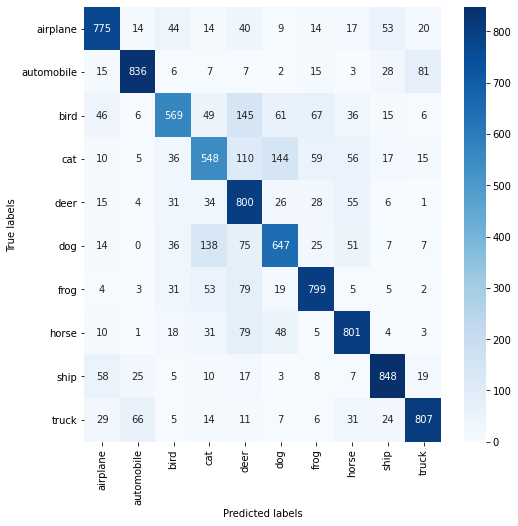

In [ ]:
#CNN confusion matrix
con_mat = confusion_matrix(y_test, y_pred2)

plt.figure(figsize = (8, 8))
x_t = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
y_t = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(con_mat, annot = True,xticklabels = x_t, yticklabels = y_t, cmap = 'Blues',fmt = "d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

##### By comparing accuracy,F1 score and confusion matrix. We can find CNN model has higher accuracy and higher F1 score. So we can conclude that the classification result is better. Through the confusion matrix, we can find the CNN works much better on attributes deer, cat and bird.